<a href="https://colab.research.google.com/github/sujan6539/ml/blob/main/intro_to_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
2+2

4

In [114]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbs
import numpy as np



url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'

df = pd.read_csv(url)

df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [115]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [116]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['species']= le.fit_transform(df['species'])


In [117]:
df['species'].unique()


array([0, 1, 2])

In [118]:
from operator import xor
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):

  def __init__(self, inFeatures=4, h1 = 4 , h2 = 5, outFeatures = 3) -> None:
    super().__init__()
    self.fc1 = nn.Linear(inFeatures, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, outFeatures)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x



In [119]:
torch.manual_seed(41)
model = Model()



In [120]:
%matplotlib inline


#split the features from target by using drop

X = df.drop('species', axis = 1)
y = df['species']

In [121]:
# convert table to numpy array for processing
X = X.values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [122]:
# convert table to numpy array for processing
y = y.values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
# create a train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 41)


In [125]:
# standarize test and train data to float type
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [126]:
for name, param in model.named_parameters():
  print(f"Parameter Name: {name}, Shape: {param.shape}")

Parameter Name: fc1.weight, Shape: torch.Size([4, 4])
Parameter Name: fc1.bias, Shape: torch.Size([4])
Parameter Name: fc2.weight, Shape: torch.Size([5, 4])
Parameter Name: fc2.bias, Shape: torch.Size([5])
Parameter Name: out.weight, Shape: torch.Size([3, 5])
Parameter Name: out.bias, Shape: torch.Size([3])


In [127]:
#set the criterion to measure the error: how far are prediction from data
criterion = nn.CrossEntropyLoss()
# Choose optimizer, set learning rate
# lower the learning rate, longer and more process intensive it is
# model.parameters return the layers h1 , h2 etc
optimizer = torch.optim.Adam(params=model.parameters(), lr = 0.01)

In [129]:
#train model
epochs = 100
losses = []

for i in range(epochs):
  # get prediction from train
  y_pred = model.forward(X_train)

  #measure the loss
  loss = criterion(y_pred, y_train) # prediction vs the target value

  #keep track of losses
  losses.append(loss.detach().numpy())

  if(i%10 == 0):
    print(f'Epoch: {i} and loss: {loss}')

  #back propogation for tuning. nn changes weight and pass through to get better result
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 0.11591685563325882
Epoch: 10 and loss: 0.08964110910892487
Epoch: 20 and loss: 0.07255199551582336
Epoch: 30 and loss: 0.06122170388698578
Epoch: 40 and loss: 0.05339278653264046
Epoch: 50 and loss: 0.047697413712739944
Epoch: 60 and loss: 0.043356966227293015
Epoch: 70 and loss: 0.03992331773042679
Epoch: 80 and loss: 0.03712327778339386
Epoch: 90 and loss: 0.034784555435180664


Text(0.5, 0, 'Epoch')

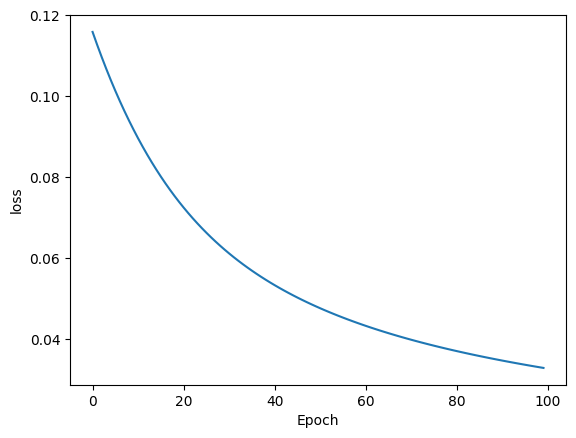

In [131]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('Epoch')